# Import data set

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\hp\Downloads\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [4]:
data.shape

(21, 2)

In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Cheaking duplicates and missing value

In [7]:
data[data.duplicated()].shape

(0, 2)

In [8]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Outlier detection

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

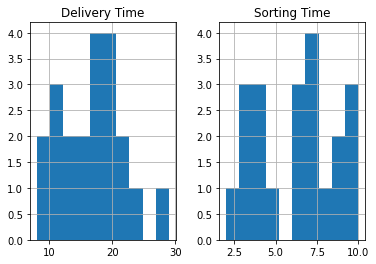

In [10]:
data.hist()

<AxesSubplot:>

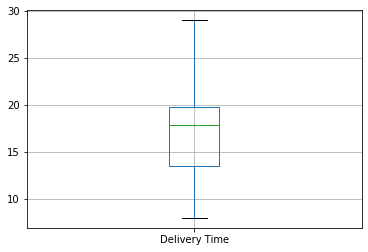

In [11]:
data.boxplot('Delivery Time')

<AxesSubplot:>

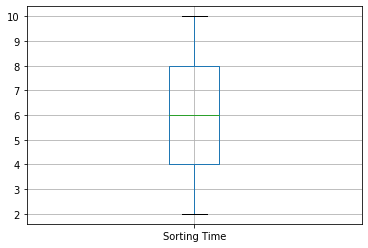

In [12]:
data.boxplot('Sorting Time')

1) we clearly see no outlier

# Finding Corelation

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

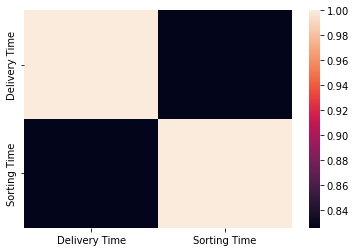

In [14]:
sns.heatmap(data.corr())

We see slight positive corelation

# Visualization

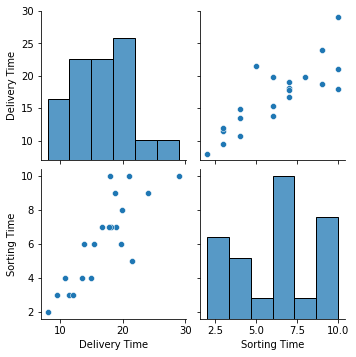

In [15]:
sns.pairplot(data)

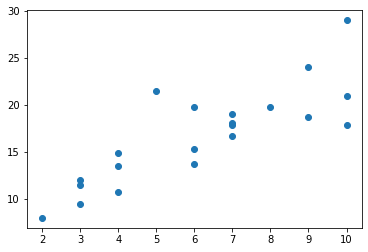

In [16]:
plt.scatter(data['Sorting Time'],data['Delivery Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

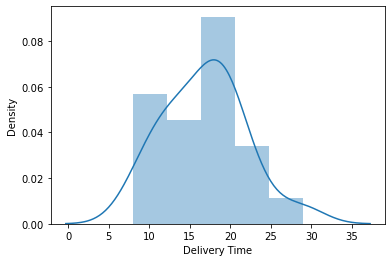

In [17]:
sns.distplot(data['Delivery Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

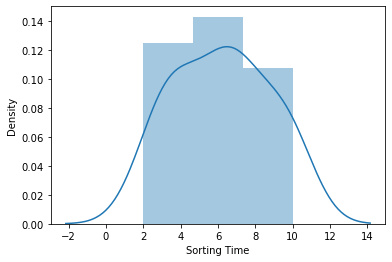

In [18]:
sns.distplot(data['Sorting Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

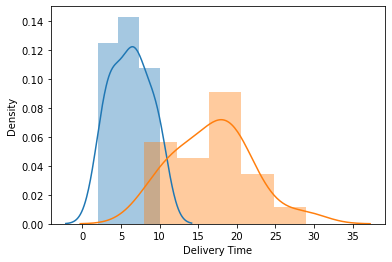

In [19]:
sns.distplot(data['Sorting Time'])
sns.distplot(data['Delivery Time'])

# Auto-EDA

In [20]:
import sweetviz as sv

In [21]:
AutoEda= sv.analyze(data)
AutoEda.show_html('weather report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Fitting regression line and model

In [22]:
data.rename(columns = {'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'}, inplace = True)

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

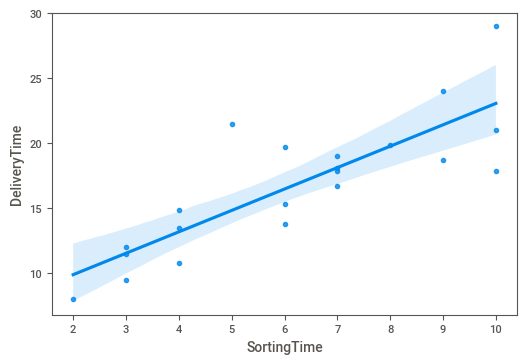

In [23]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=data)

In [24]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~ SortingTime",data = data).fit()
model

In [25]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 29 May 2023   Prob (F-statistic):           3.98e-06
Time:                        09:38:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.rsquared

0.6822714748417231

In [28]:
model.rsquared_adj

0.6655489208860244

# transformation

log transformation

In [29]:
import numpy as np

In [30]:
datalog=np.log(data)

In [31]:
datalog.head()

,DeliveryTime,SortingTime
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


array([[<AxesSubplot:title={'center':'DeliveryTime'}>,
        <AxesSubplot:title={'center':'SortingTime'}>]], dtype=object)

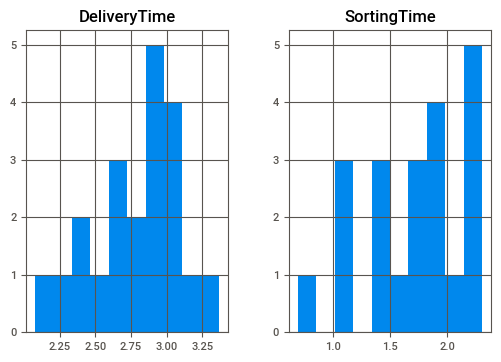

In [32]:
datalog.hist()

# regression plot and model buliding with this log transformation

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

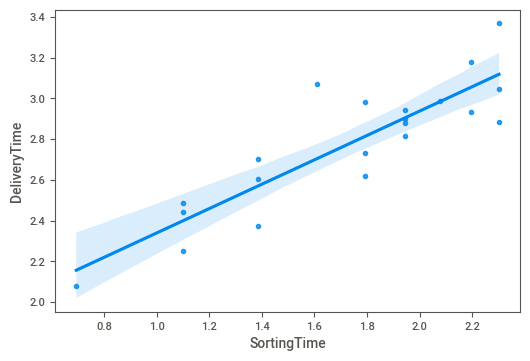

In [33]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=datalog)

In [34]:
model1 = smf.ols("DeliveryTime~SortingTime",data =datalog).fit()

In [35]:
model1.params

Intercept      1.741987
SortingTime    0.597522
dtype: float64

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 29 May 2023   Prob (F-statistic):           1.60e-07
Time:                        09:38:33   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
SortingTime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
(model1.rsquared,model1.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

# square root transformation

In [38]:
datasqrt = np.sqrt(datalog)

In [39]:
datasqrt.head()

,DeliveryTime,SortingTime
0,1.744856,1.517427
1,1.613285,1.177410
2,1.727181,1.338566
3,1.782710,1.482304
4,1.835019,1.517427


# Now build a regression line plot and model from this transformation

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

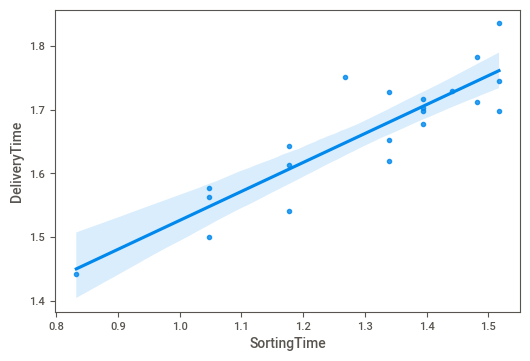

In [40]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=datasqrt)

In [41]:
model2 = smf.ols("DeliveryTime~SortingTime",data =datasqrt).fit()

In [42]:
model2.params

Intercept      1.072394
SortingTime    0.453829
dtype: float64

In [43]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     71.53
Date:                Mon, 29 May 2023   Prob (F-statistic):           7.27e-08
Time:                        09:38:33   Log-Likelihood:                 36.074
No. Observations:                  21   AIC:                            -68.15
Df Residuals:                      19   BIC:                            -66.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0724      0.071     15.201      0.000       0.925       1.220
SortingTime     0.4538      0.054      8.457      0.000       0.342       0.566
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.797
Skew:                           0.467   Prob(JB):                        0.671
Kurtosis:                       2.803   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
(model2.rsquared,model2.rsquared_adj)

(0.7901177427641342, 0.7790713081727728)

# Lets build model with this sq data and we will see the result

In [45]:
datasquare = np.square(data)

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

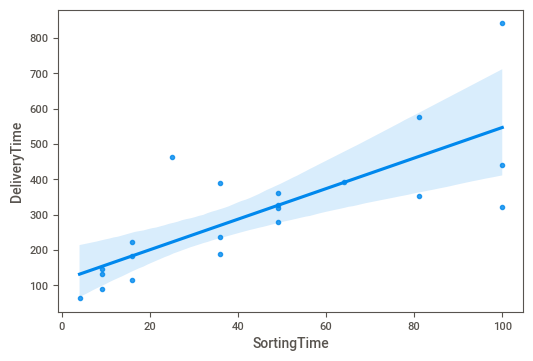

In [46]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=datasquare)

In [47]:
model3 = smf.ols("DeliveryTime~SortingTime",data =datasquare).fit()

In [48]:
model3.params

Intercept      114.154847
SortingTime      4.323874
dtype: float64

In [49]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Mon, 29 May 2023   Prob (F-statistic):           4.99e-05
Time:                        09:38:33   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     114.1548     45.231      2.524      0.021      19.485     208.825
SortingTime     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
(model3.rsquared,model3.rsquared_adj)

(0.5881883446986836, 0.566514047051246)

In [51]:
datasquare2 = np.square(datalog)

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

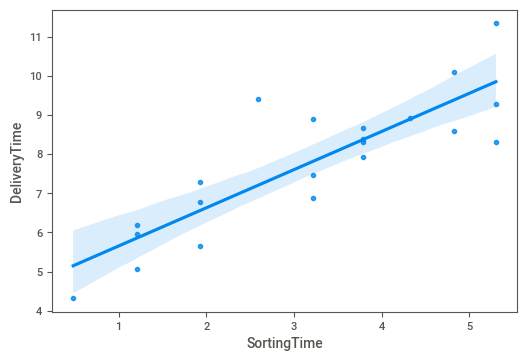

In [52]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=datasquare2)

In [53]:
model4 = smf.ols("DeliveryTime~SortingTime",data =datasquare2).fit()

In [54]:
model4.params

Intercept      4.678842
SortingTime    0.975238
dtype: float64

In [55]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     50.94
Date:                Mon, 29 May 2023   Prob (F-statistic):           8.74e-07
Time:                        09:38:34   Log-Likelihood:                -27.099
No. Observations:                  21   AIC:                             58.20
Df Residuals:                      19   BIC:                             60.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6788      0.481      9.725      0.000       3.672       5.686
SortingTime     0.9752      0.137      7.137      0.000       0.689       1.261
==============================================================================
Omnibus:                        2.507   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.450
Skew:                           0.642   Prob(JB):                        0.484
Kurtosis:                       3.105   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
(model4.rsquared,model4.rsquared_adj)

(0.7283237434210703, 0.7140249930748108)

In [57]:
d={'variables':['model','model1','model2','model3','model4'],
    'rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
   'rsquared_adj':[model.rsquared_adj,model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj],
    'aic score':[model.aic,model1.aic,model2.aic,model3.aic,model4.aic],
    'bic score':[model.bic,model1.bic,model2.bic,model3.bic,model4.bic]}

In [58]:
VifFrame=pd.DataFrame(d)
VifFrame

,variables,rsquared,rsquared_adj,aic score,bic score
0,model,0.682271,0.665549,106.714002,108.803047
1,model1,0.772161,0.760170,-16.581284,-14.492239
2,model2,0.790118,0.779071,-68.147115,-66.058070
3,model3,0.588188,0.566514,262.487023,264.576067
4,model4,0.728324,0.714025,58.198815,60.287860


# model2 have high r squared and rsquared_adj value and low aic and bic value so we go with model2 

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

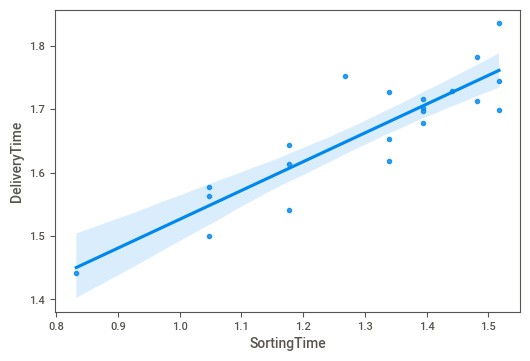

In [59]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=datasqrt)

In [60]:
model2 = smf.ols("DeliveryTime~SortingTime",data =datasqrt).fit()

array([[<AxesSubplot:title={'center':'DeliveryTime'}>,
        <AxesSubplot:title={'center':'SortingTime'}>]], dtype=object)

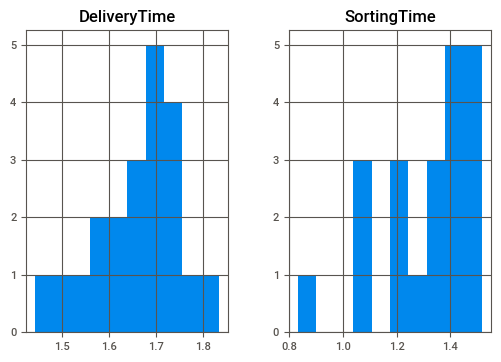

In [61]:
datasqrt.hist()

# Predict for new data

In [62]:
newdata = pd.Series([15,20])

In [63]:
prediction = pd.DataFrame(newdata,columns=['SortingTime'])

In [64]:
model2.predict(prediction)

0     7.879832
1    10.148977
dtype: float64

In [65]:
newdata2=pd.Series([2,6])
prediction2=pd.DataFrame(newdata2,columns=['SortingTime'])
model2.predict(prediction2)

0    1.980052
1    3.795369
dtype: float64